In [3]:
import seaborn as sns
iris = sns.load_dataset("iris")

type(iris)


pandas.core.frame.DataFrame

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = iris[feature_columns].values
y = iris['species'].values

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [16]:
from math import sqrt
import numpy as np
import pandas as pd

In [17]:
def euclideanDistance(instance1, instance2, length):
    distance = 0.0
    for i in range(length-1):
        distance += (instance1[i] - instance2[i])**2
    return sqrt(distance)

In [19]:
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print ('Distance: ' + repr(distance))

Distance: 2.8284271247461903


In [21]:
import operator

def getNeighbors(trainingSet, testInstance, k):

    distances = []

    length = len(testInstance)-1

    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet[x], length)

        distances.append((trainingSet[x], dist))

        distances.sort(key=operator.itemgetter(1))

    neighbors = []

    for x in range(k):

        neighbors.append(distances[x][0])

    return neighbors


In [22]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

[[4, 4, 4, 'b']]


In [29]:
import operator

def getResponse(neighbors):
    
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [30]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

a


In [31]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [32]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)

66.66666666666666


In [35]:
import csv
import random
import math
import operator
 
def handleDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'rb') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split: 
                trainingSet.append(dataset[x]) 
            else: testSet.append(dataset[x]) 
def euclideanDistance(instance1, instance2, length): 
    distance = 0 
    for x in range(length): 
        distance += pow((instance1[x] - instance2[x]), 2) 
    return math.sqrt(distance) 
def getNeighbors(trainingSet, testInstance, k): 
    distances = [] 
    length = len(testInstance)-1 
    for x in range(len(trainingSet)): 
        dist = euclideanDistance(testInstance, trainingSet[x], length) 
        distances.append((trainingSet[x], dist)) 
        distances.sort(key=operator.itemgetter(1)) 
        neighbors = [] 
    for x in range(k): 
        neighbors.append(distances[x][0]) 
    return neighbors 
def getResponse(neighbors): 
    classVotes = {} 
    for x in range(len(neighbors)): 
        response = neighbors[x][-1] 
        if response in classVotes: 
            classVotes[response] += 1 
        else: classVotes[response] = 1 
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0] 
def getAccuracy(testSet, predictions): 
    correct = 0 
    for x in range(len(testSet)): 
        if testSet[x][-1] == predictions[x]: 
            correct += 1 
    return (correct/float(len(testSet))) * 100.0 
def main(): 
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
     
main()

Accuracy: 66.66666666666666%


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)  
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 1.0


In [42]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.97
Accuracy for k= 2 is: 0.97
Accuracy for k= 3 is: 0.93
Accuracy for k= 4 is: 0.97
Accuracy for k= 5 is: 1.0
Accuracy for k= 6 is: 1.0
Accuracy for k= 7 is: 1.0
Accuracy for k= 8 is: 1.0
Accuracy for k= 9 is: 1.0
Accuracy for k= 10 is: 1.0
Accuracy for k= 11 is: 1.0
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 1.0
Accuracy for k= 15 is: 1.0
Accuracy for k= 16 is: 1.0
Accuracy for k= 17 is: 1.0
Accuracy for k= 18 is: 1.0
Accuracy for k= 19 is: 1.0
Accuracy for k= 20 is: 1.0
Accuracy for k= 21 is: 1.0
Accuracy for k= 22 is: 1.0
Accuracy for k= 23 is: 1.0
Accuracy for k= 24 is: 1.0
Accuracy for k= 25 is: 0.97
Accuracy for k= 26 is: 1.0
Accuracy for k= 27 is: 0.97
Accuracy for k= 28 is: 0.97
Accuracy for k= 29 is: 1.0


Text(0, 0.5, 'Testing Accuracy')

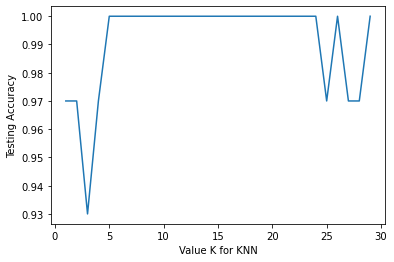

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')